In [12]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [36]:
DATA_DIR = 'lstm-basic-test/data'

def get_data(folder):
    data = {}
    for filename in os.listdir(folder):
        if filename.endswith(".csv") and ('lstm-' in filename):
            df = pd.read_csv(folder + "/" + filename)
            df.columns = df.columns.str.replace(' ', '')
            data[os.path.splitext(filename)[0]] = df
            continue
        else:
            continue
    return data

In [37]:
dt = get_data(DATA_DIR)

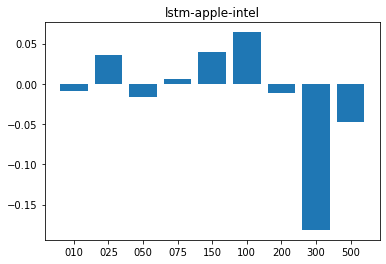

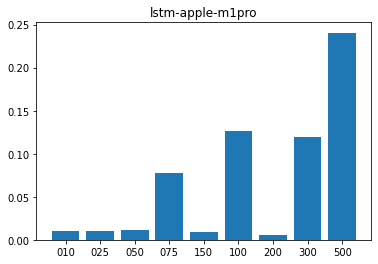

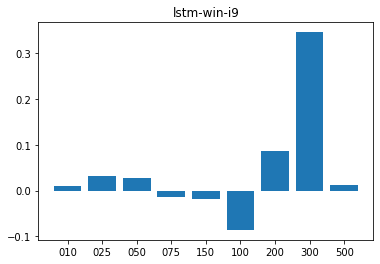

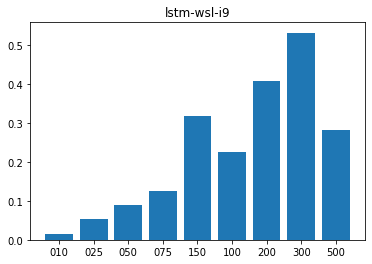

In [40]:
def plot_diff(df):
    y1 = []
    y2 = []
    x = []
    i = 0
    while i < int(len(df)):
        y1.append(df['TrainTime'][i+1] - df['TrainTime'][i])
        y2.append(df['PredictTime'][i+1] - df['PredictTime'][i])
        str = "0" if df['Cells'][i] < 100 else ""
        str += df['Cells'][i].astype('U')
        x.append(str)
        i += 2

    #colors = ["red" if i == 'tanh' else "green" if i == 'tanf' else "blue" for i in data]
    plt.title(key)
    plt.bar(x, y1, ) #color=colors)
    plt.show()
        
for i, key in enumerate(dt):
    plot_diff(dt[key])
